In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Import a CSV file
import pandas as pd

In [2]:
musicEmotion = pd.read_csv("Data/data.csv")
musicEmotion = musicEmotion.groupby('track id')

#print(len(musicEmotion.get_group(1)))
#musicEmotion = np.asmatrix(musicEmotion)


In [3]:
# musicEmotionOne = musicEmotion.get_group(1)
# musicEmotionOne = np.asmatrix(musicEmotionOne)
# musicEmotionOne[0,2:3]
# print(musicEmotionOne[0,3:4])
print(len(musicEmotion))
#print(musicEmotion.get_group(400))

400


In [4]:
# arrTwo = []
# for i in range(1,len(musicEmotion)+1):
#     countTwo = 0
#     arr = np.zeros(9)
#     musicEmotionOne = musicEmotion.get_group(i)
#     musicEmotionOne = np.asmatrix(musicEmotionOne)
#     for j in range(2,11):
#         count = 0
#         for m in range(len(musicEmotion.get_group(i))):
#             count += musicEmotionOne[m,j:j+1]
#         arr[countTwo] = count / len(musicEmotion.get_group(i))
#         countTwo += 1
#     arrTwo.append(arr)

# arrTwo = np.asarray(arrTwo)
# print(len(arrTwo))
# print(arrTwo[0])

In [5]:
musicEmotionAvgs = []
for i in range(1,len(musicEmotion)+1): #Arrays grouped by track ID 1-400(inclusive)
    count = 0
    song = np.zeros(9) #Array to hold avg of each emotion for given song
    musicEmotionOne = musicEmotion.get_group(i) #Get each group loop
    musicEmotionOne = np.asmatrix(musicEmotionOne) 
    for j in range(2,11): #Avg each of the 9 emotions columms C through K from each grouping
        song[count] = np.sum(musicEmotionOne[:,j:j+1]) / len(musicEmotionOne) #Avg for each emotion
        count += 1 #Keeps track current place in the song array
    musicEmotionAvgs.append(song)

musicEmotionAvgs = np.asarray(musicEmotionAvgs) #Coverts Matrix to an array


In [6]:
print(len(musicEmotionAvgs))
print(musicEmotionAvgs[0])
print(musicEmotionAvgs.shape)

400
[0.14583333 0.33333333 0.20833333 0.29166667 0.625      0.02083333
 0.08333333 0.0625     0.3125    ]
(400, 9)


In [7]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================

    for i in np.arange(idx.size):
        
        J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))
            
        idx[i] = np.argmin(J)
    
    # =============================================================
    return idx

In [8]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================

    for i in np.arange(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
        
    
    # =============================================================
    return centroids

In [9]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    m, n = X.shape
    
    # You should return this values correctly
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================

    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K], :]
    
    # =============================================================
    return centroids

In [10]:
centroids = kMeansInitCentroids(musicEmotionAvgs, 9)
print(centroids)

[[0.27659574 0.21276596 0.0212766  0.04255319 0.0212766  0.5106383
  0.63829787 0.21276596 0.0212766 ]
 [0.16666667 0.16666667 0.08333333 0.33333333 0.41666667 0.16666667
  0.58333333 0.08333333 0.08333333]
 [0.09090909 0.         0.09090909 0.36363636 0.27272727 0.09090909
  0.81818182 0.         0.        ]
 [0.16666667 0.41666667 0.16666667 0.         0.58333333 0.
  0.08333333 0.5        0.33333333]
 [0.18181818 0.18181818 0.09090909 0.18181818 0.63636364 0.09090909
  0.09090909 0.09090909 0.        ]
 [0.25       0.33333333 0.         0.08333333 0.08333333 0.41666667
  0.66666667 0.5        0.16666667]
 [0.08333333 0.         0.08333333 0.66666667 0.16666667 0.16666667
  0.25       0.16666667 0.41666667]
 [0.         0.11764706 0.43137255 0.37254902 0.47058824 0.
  0.         0.07843137 0.31372549]
 [0.         0.22222222 0.27777778 0.44444444 0.55555556 0.05555556
  0.05555556 0.11111111 0.22222222]]


In [11]:
centroids, idx = utils.runkMeans(musicEmotionAvgs, centroids, findClosestCentroids, computeCentroids, 100, True)
print(centroids)

[[0.19904736 0.13926665 0.04043321 0.10122875 0.05951841 0.45448887
  0.54506972 0.24298995 0.06469021]
 [0.19848596 0.13330699 0.15991863 0.23219414 0.29974165 0.14634506
  0.47330599 0.16939106 0.10303131]
 [0.23378745 0.07063634 0.18602694 0.2260773  0.11503692 0.11938008
  0.75647936 0.09685794 0.01229381]
 [0.09678752 0.39375566 0.08597204 0.12383932 0.30761643 0.16751782
  0.06159663 0.44697095 0.28765435]
 [0.17531915 0.20735001 0.1969851  0.19154297 0.53282658 0.10917019
  0.15153468 0.18283014 0.09157321]
 [0.12487508 0.21836074 0.02923239 0.09688254 0.08806451 0.34745621
  0.36489523 0.49467295 0.10863991]
 [0.11873976 0.11768337 0.13031211 0.45087531 0.186784   0.20510078
  0.18783557 0.20524941 0.36943693]
 [0.08869685 0.11848476 0.45234194 0.42332438 0.41401624 0.02375117
  0.06062618 0.09271997 0.340966  ]
 [0.08500519 0.24002784 0.26284582 0.40312161 0.49453852 0.07577885
  0.10440818 0.12758579 0.22853818]]


In [12]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is 
        the number of features.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we 
        mentioned in class.
    
    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix. 

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================

    Sigma = (1 / m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    
    # ============================================================
    return U, S

In [13]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    
    Instructions
    ------------
    Compute the projection of the data using only the top K 
    eigenvectors in U (first K columns). 
    For the i-th example X[i,:], the projection on to the k-th 
    eigenvector is given as follows:
    
        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================

    Z = np.dot(X,  U[:, :K])
    
    # =============================================================
    return Z

In [14]:
# TODO Add PCA and dimension reduction for visualization purposes

In [15]:
U,S = pca(musicEmotionAvgs)
print(U)

[[-0.19739302  0.11858312 -0.16035008  0.05915432 -0.12850891  0.12559074
   0.18373907 -0.2535166   0.88738062]
 [-0.29878734  0.02427231  0.37459729  0.35143921 -0.54562544  0.33105563
   0.29656015 -0.26157837 -0.28745124]
 [-0.27823362 -0.3051208  -0.23807749 -0.10542476  0.16233326 -0.38677097
   0.75245003 -0.01532475 -0.13904072]
 [-0.39685765 -0.30271025 -0.12805721 -0.49699182 -0.01868743  0.07391145
  -0.37430976 -0.56840608 -0.13588816]
 [-0.47418033 -0.42703869 -0.08292362  0.56893331  0.05729595 -0.17604855
  -0.37555625  0.2807756   0.08986759]
 [-0.27196706  0.42612539  0.16380294 -0.21694707 -0.42648131 -0.66873936
  -0.14996874  0.13461977  0.02901549]
 [-0.37521757  0.53226246 -0.61038889  0.03411423  0.06414614  0.31803703
  -0.00374232  0.18734132 -0.24859005]
 [-0.34092     0.34078579  0.51555443  0.07347521  0.68269851 -0.01725152
   0.02843163 -0.17051568  0.01359401]
 [-0.28464792 -0.19295992  0.29800419 -0.4874038  -0.06095834  0.37406398
   0.08745115  0.61875

In [16]:
z = projectData(musicEmotionAvgs, U, 2)
print(z)

[[-0.74565454 -0.37914041]
 [-0.73555918 -0.51796895]
 [-0.63117188  0.30117479]
 [-0.80799213 -0.61384974]
 [-0.73460365 -0.32240856]
 [-0.70933133 -0.2029    ]
 [-0.63634961  0.49345334]
 [-0.72032943 -0.23352913]
 [-0.73031323 -0.4114009 ]
 [-0.6080361   0.63524478]
 [-0.67407769 -0.30781528]
 [-0.59858696  0.32546838]
 [-0.68398429 -0.21581073]
 [-0.65009231 -0.19552701]
 [-0.72542926 -0.40161881]
 [-0.6309113   0.53132594]
 [-0.86187928 -0.65524275]
 [-0.58678584  0.4276987 ]
 [-0.67352906 -0.33063062]
 [-0.7403247  -0.27227869]
 [-0.73081173 -0.33072792]
 [-0.77146039 -0.07082616]
 [-0.63087076  0.47322788]
 [-0.61162289  0.58194596]
 [-0.66357012 -0.01199109]
 [-0.67050583  0.5207769 ]
 [-0.67662159  0.44696695]
 [-0.60292726  0.12834076]
 [-0.66598123 -0.27919731]
 [-0.60286903  0.4903136 ]
 [-0.7069156  -0.42401246]
 [-0.63576413 -0.31464053]
 [-0.71613091 -0.49631324]
 [-0.5866877   0.21609953]
 [-0.62342624 -0.37392267]
 [-0.67370209 -0.32963379]
 [-0.68323955 -0.30789736]
 

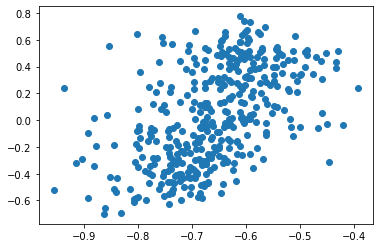

In [17]:
song_plot = pyplot.scatter(z[:,:1], z[:,1:2])

In [18]:
U1,S1 = pca(centroids)
print(U1)

[[-0.22285466  0.13067441 -0.09519791  0.12319343 -0.08843577  0.07442456
   0.08894464 -0.63632788 -0.69486439]
 [-0.27515392 -0.08321833  0.35908228  0.24465645  0.2277657   0.21055181
   0.57721756  0.46357839 -0.29029958]
 [-0.26460387 -0.26434538 -0.32013286 -0.00082184  0.20655636 -0.81812312
   0.06752273  0.13561314 -0.15059672]
 [-0.38473986 -0.27207218 -0.28235166 -0.48469907 -0.1022817   0.37555983
  -0.34841661  0.33802355 -0.27592667]
 [-0.42496351 -0.43686009 -0.07762151  0.60369354 -0.30641653  0.13672829
  -0.12522063 -0.13577109  0.33374928]
 [-0.27419085  0.30232722  0.30964241 -0.21112031 -0.7573689  -0.29385936
   0.12277254  0.13153942  0.0251144 ]
 [-0.45724279  0.6731106  -0.41410421  0.07107833  0.23295653  0.11205082
   0.08279398  0.04725414  0.29224098]
 [-0.3427756   0.12098225  0.61969118  0.01130254  0.36894635 -0.13719729
  -0.56704019 -0.08484508 -0.00674561]
 [-0.27248021 -0.28659044  0.14962215 -0.52520014  0.17113134  0.05772222
   0.41690832 -0.44984

In [19]:
z1 = projectData(centroids, U1, 2)
print(z1)

[[-0.63238078  0.46534423]
 [-0.6826215   0.13224787]
 [-0.67180539  0.41721298]
 [-0.6367205  -0.14718182]
 [-0.63521615 -0.20042196]
 [-0.63162465  0.30495981]
 [-0.65931189 -0.12559757]
 [-0.6697929  -0.45239753]
 [-0.69431938 -0.36094409]]


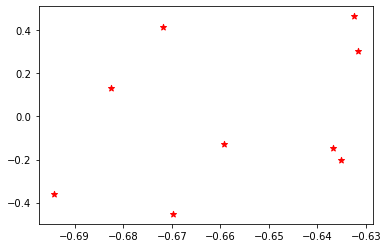

In [20]:
centroid_plot = pyplot.scatter(z1[:,:1], z1[:,1:2], color = "red",  
            marker= "*", s=40)

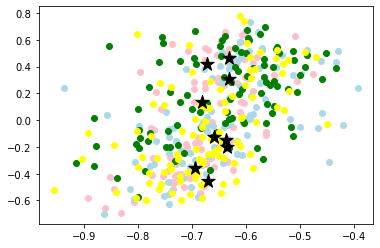

In [27]:
final_plot = pyplot.gca()

# final_plot.scatter(z[:,:1], z[:,1:2], color = "pink")


final_plot.scatter(z[:101,:1], z[:101,1:2], color = "pink") #Classical
final_plot.scatter(z[101:201,:1], z[101:201,1:2], color = "lightblue")#Rock
final_plot.scatter(z[201:301,:1], z[201:301,1:2], color = "green")#Electronic
final_plot.scatter(z[301:401,:1], z[301:401,1:2], color = "yellow")#Pop
final_plot.scatter(z1[:,:1], z1[:,1:2], color = "black",  
            marker= "*", s=200)

In [91]:
classical = z[:101,:]
rock = z[101:201,:]
electronic = z[201:301,:]
pop = z[301:401,:]
songArray = [classical,rock,electronic,pop]
# for i in range(3):
#     arr = songArray[i]
#     arrTwo = songArray[i+1]
#     for j in range(99):
        
#         y = arr[j][1] - arrTwo[j][1]
#         x = arr[j][0] - arrTwo[j][0]
        
#         num = y/x
#         if(abs(num) < 0.25):
#             print(" Song 1 I: ", i, "J: ", j)
#             print(" Song 2 I: ", i+1, "J: ", j)
            

            

for n in range(3):#First array
    arr = songArray[n]
    
    for i in range(n+1,4): #arrays to compare
        arrTwo = songArray[i]
        for j in range(99): #compare each song of the first array
            song = arr[j]
            for m in range(99): #compare j song to all of second genre songs
                y = (song[0] - arrTwo[m][0])**2 
                x = (song[1] - arrTwo[m][1])**2 
                
                num = np.sqrt((y+x))
                
                if(abs(num) < 0.01):
#                     print("Song 1: " , song)
#                     print("Song 2: ", arrTwo[m])
                    print(" Genre: ", n, "J: ", j)
                    print(" Genre: ", i, "J: ", m)

 Genre:  0 J:  1
 Genre:  1 J:  43
 Genre:  0 J:  7
 Genre:  1 J:  70
 Genre:  0 J:  23
 Genre:  1 J:  42
 Genre:  0 J:  23
 Genre:  1 J:  60
 Genre:  0 J:  28
 Genre:  1 J:  82
 Genre:  0 J:  31
 Genre:  1 J:  0
 Genre:  0 J:  47
 Genre:  1 J:  52
 Genre:  0 J:  55
 Genre:  1 J:  4
 Genre:  0 J:  97
 Genre:  1 J:  31
 Genre:  0 J:  11
 Genre:  2 J:  10
 Genre:  0 J:  47
 Genre:  2 J:  6
 Genre:  0 J:  8
 Genre:  3 J:  50
 Genre:  0 J:  10
 Genre:  3 J:  35
 Genre:  0 J:  12
 Genre:  3 J:  9
 Genre:  0 J:  18
 Genre:  3 J:  28
 Genre:  0 J:  35
 Genre:  3 J:  28
 Genre:  0 J:  36
 Genre:  3 J:  35
 Genre:  0 J:  37
 Genre:  3 J:  8
 Genre:  0 J:  47
 Genre:  3 J:  37
 Genre:  0 J:  60
 Genre:  3 J:  77
 Genre:  0 J:  83
 Genre:  3 J:  18
 Genre:  0 J:  84
 Genre:  3 J:  77
 Genre:  0 J:  91
 Genre:  3 J:  35
 Genre:  1 J:  1
 Genre:  2 J:  84
 Genre:  1 J:  13
 Genre:  2 J:  78
 Genre:  1 J:  25
 Genre:  2 J:  76
 Genre:  1 J:  52
 Genre:  2 J:  6
 Genre:  1 J:  53
 Genre:  2 J:  16
 G